Hands on session for image classification. Here a data set from kaggle for dog breed identification challenge is being used for illustration, however this same workflow can be translated into other image classification problems as well.
Download the data from here: https://www.kaggle.com/c/dog-breed-identification

# Setting the Environment

Install Anaconda Python 3 version: https://www.anaconda.com/download/
Once the installation finishes, you will have to create a virtual environment called conda environment with the python tools required for your general ML development, so that it does not interfere with your bare metal python installations and avoid other version mismatch issues. To create a conda environment, follow these instructions
1. The default installation for python 3 in anaconda is 3.7 but tensorflow has not yet released a compatible version for 3.7
2. So we are going to create a vitrual environment in python 3.4/3.5/3.6 Currently tensorflow
3. If you are using GPU you should check for compatible CUDA and CuDNN libraries.
4. If you are using windows go to start and open anaconda prompt, if you are using UNIX based system add conda to your path
5. Run these commands: 
        >> conda create -n dog_breed_env python=3.5
        >> conda activate dog_breed_env
        >> pip install tensorflow-gpu
        >> pip install pandas
        >> pip install keras
        >> pip install jupyterlab
6. For more Details refer: https://conda.io/docs/user-guide/tasks/manage-environments.html

In [128]:
import keras
from keras.layers import Dense, Activation, Conv2D,MaxPooling2D,Flatten, Dropout
from keras.models import Sequential
import os
import sys
import cv2
import pandas as pd
import numpy as np

# Read the Images

In [129]:
base_dir=os.getcwd()
data=pd.read_csv("labels.csv")

## Inspect the Data

In [130]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


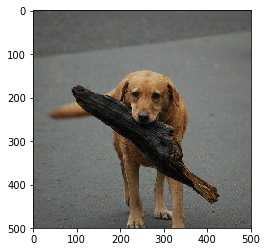

In [40]:
img_filepath=os.path.join(base_dir,'train',data['id'][4]+'.jpg')
#print(img_filepath)
import matplotlib.image as mpimg
img=mpimg.imread(img_filepath)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

Number of classes

In [43]:
classes=data['breed'].unique()
len(classes)

One hot encoding classes

In [46]:
oh_array=np.ones([len(classes)])

In [131]:
one_hot_dictionary={}
class_count=0
for c in classes:
    oh_array=np.zeros([len(classes)])
    oh_array[class_count]=1
    one_hot_dictionary[c]=oh_array
    class_count+=1

Writing a custom generator, there are image generators available in keras that you can use, please go through the documentation here: https://keras.io/preprocessing/image/

In [132]:
def doggy_generator(start=0,stop=7000,reshape_dim=[512,512]):
    while True:
        for a in range(start,stop):
            img_filepath=os.path.join(base_dir,'train',data['id'][a]+'.jpg')
            #print(img_filepath)
            img=cv2.imread(img_filepath)
            resized_img=cv2.resize(img,(reshape_dim[0],reshape_dim[1]),interpolation=cv2.INTER_CUBIC)
            img_np=np.zeros([1,512,512,3])
            breed=data['breed'][a]
            oh_label=one_hot_dictionary[breed]
            label_np=np.zeros([1,120])
            img_np[0,:,:,:]=resized_img
            label_np[0,:]=oh_label
            yield img_np,label_np

In [133]:
traingen=doggy_generator()
testgen=doggy_generator(7000,len(data['id']))

In [115]:
a=traingen.__next__()

In [116]:
a[1].shape

(1, 120)

In [83]:
def dog_breed_classifier_model(img_row,img_col,classes): 
    model=Sequential()

    model.add(Conv2D(32,3,3,input_shape=(img_row,img_col,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32,3,3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,3,3))
    model.add(Activation('relu'))
    model.add(Conv2D(64,3,3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,4,4))
    model.add(Activation('relu'))
    model.add(Conv2D(64,3,3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,4,4))
    model.add(Activation('relu'))
    model.add(Conv2D(64,3,3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model

In [84]:
model=dog_breed_classifier_model(512,512,120)

c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(512, 512,...)`
  import sys
c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]
c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  from ipykernel import kernelapp as app
c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4))`
c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:21: 

In [ ]:
model.summary()

In [88]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit_generator(traingen,steps_per_epoch=7000,epochs=10,validation_data=testgen,validation_steps=3000)

## Transfer Learning
When we use the weights or architecture of the models which were trained earlier for similar cases, it's called transfer learning. We can use the same for our case. Many models were trained on natural images for the Imagenet challenge. These models are highly complex and have been trained on 100s of GPUs optimized for much larger classification problem.

In [134]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD

def add_new_last_layer(base_model,classes):    
    '''
    Function to add new trainable layers to the base models
    '''
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024, activation='relu')(x)
    predict=Dense(classes, activation='softmax')(x)
    model = Model(input=base_model.input, output=predict)
    return model

def setup_finetuning(model,freeze_layers):
    '''
    Function to freeze layers in the model and return compiled model
    '''
    for layer in model.layers[:freeze_layers]:
        layer.trainable=False
    for layer in model.layers[freeze_layers:]:
        layer.trainable= True
    model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])
    
def transfer_learning_setup(model, basemodel):
    '''
    Another function to freeze base model layers and return compiled model
    '''
    for layer in basemodel.layers:
        layer.trainable=False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
# Inception model with final layer changed
base_model = InceptionV3(weights='imagenet', include_top=False)

In [136]:
tl_model=add_new_last_layer(base_model,120)
setup_finetuning(tl_model,172)
#tl_model.summary()

c:\users\anand\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [137]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='dog_breed_classifier.h5', save_best_only=True)

In [138]:
tl_model.fit_generator(traingen,steps_per_epoch=7000,epochs=100,validation_data=testgen,validation_steps=3000,callbacks=[checkpointer])

Epoch 1/10
7000/7000 [==============================] - 699s 100ms/step - loss: 4.8053 - acc: 0.0107 - val_loss: 15.6240 - val_acc: 0.0070
Epoch 2/10
7000/7000 [==============================] - 692s 99ms/step - loss: 4.7797 - acc: 0.0117 - val_loss: 15.5782 - val_acc: 0.0063
Epoch 3/10
7000/7000 [==============================] - 694s 99ms/step - loss: 4.7650 - acc: 0.0153 - val_loss: 15.6258 - val_acc: 0.0080
Epoch 4/10
7000/7000 [==============================] - 694s 99ms/step - loss: 4.7465 - acc: 0.0170 - val_loss: 15.6404 - val_acc: 0.0073
Epoch 5/10
7000/7000 [==============================] - 691s 99ms/step - loss: 4.7032 - acc: 0.0220 - val_loss: 15.8060 - val_acc: 0.0107
Epoch 6/10
7000/7000 [==============================] - 690s 99ms/step - loss: 4.5362 - acc: 0.0280 - val_loss: 15.7740 - val_acc: 0.0117
Epoch 7/10
7000/7000 [==============================] - 691s 99ms/step - loss: 4.2636 - acc: 0.0324 - val_loss: 15.7277 - val_acc: 0.0117
Epoch 8/10
7000/7000 [===========

In [ ]:
tl_model.predict

## Use Pretrained Models to Predict
We will be using resnet50 model which was trained on imagenet challenge data.

In [127]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path =img_filepath
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02099601', 'golden_retriever', 0.43086213), ('n02099849', 'Chesapeake_Bay_retriever', 0.2284075), ('n02099712', 'Labrador_retriever', 0.13925594)]
